In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import sys
sys.path.insert(0, '../../../')

import numpy as np
import matplotlib.pyplot as plt

from src.difsched.config import getEnvConfig, visualizeEnvConfig
from src.difsched.env import createEnv

In [3]:
configIdx = 0
envParams = getEnvConfig(configIdx)
visualizeEnvConfig(envParams)
trafficDataParentPath = f'../../../data/raw/traffic'
env = createEnv(envParams, trafficDataParentPath)
env.selectMode(mode="test", type="data")

Environment Configuration
Number of Users:        8
Window Length:          200
Dataflow:               thumb_fr
Sigmoid K List:         [0.1, 0.2, 0.3, 0.4, 0.5]
Sigmoid S List:         [10.0, 10.0, 10.0, 10.0, 10.0]
Resource Bar:           5
Bandwidth:              100
Sub Agents:             [[0, 0]]
User Map:               [[0, 1, 2, 3], [4, 5, 6, 7]]


In [4]:
a = 0.9*np.ones(envParams['N_user'])*(envParams['B']/envParams['N_user'])
print(np.sum(a))
print(a)
N_iter = 250
r_total = 0
for i in range(N_iter):
    env.updateStates()
    u, u_predicted = env.getStates()
    r = env.applyActions(a)
    r_total += r
print(r_total/N_iter)

90.0
[11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.25]
0.3557331521286371


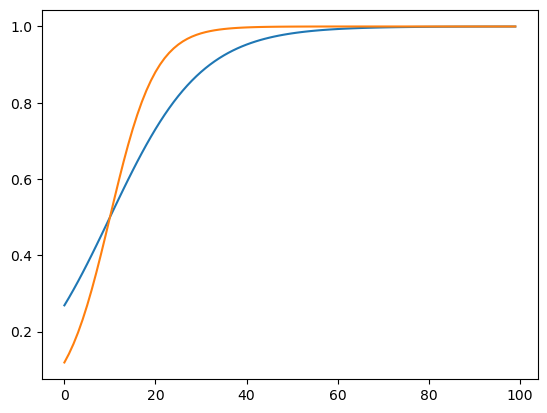

In [5]:
cdf = env.simulatorType1.wirelessModel.packetTransmissionCDF_list[0]
plt.plot(cdf)
cdf = env.simulatorType1.wirelessModel.packetTransmissionCDF_list[1]
plt.plot(cdf)

(100, 8)
(100, 8)


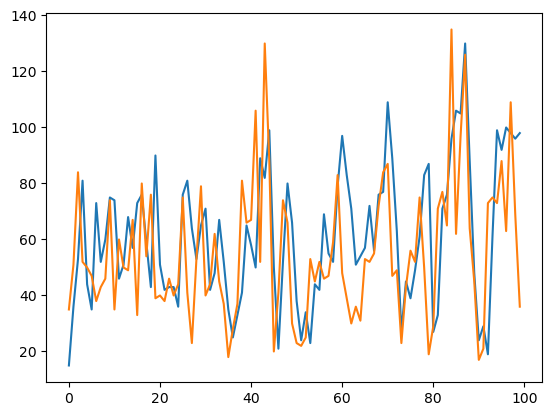

In [6]:
env.reset()
env.selectMode(mode="test", type="data")
u_record = []
u_predicted_record = []
for _ in range(100):
    env.updateStates()
    u, u_predicted = env.getStates()
    u_record.append(u)
    u_predicted_record.append(u_predicted)

u_record = np.array(u_record)
u_predicted_record = np.array(u_predicted_record)
print(u_record.shape)
print(u_predicted_record.shape)
plt.plot(u_record[:,0].flatten())
plt.plot(u_predicted_record[:,0].flatten())
plt.show()